In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('classic')

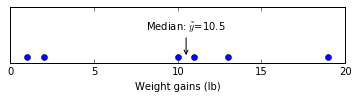

In [2]:
# Data of 2 week weight gains (lb) of young lambs
table_1 = pd.DataFrame({'Weight gains (lb)': [11, 13, 19, 2, 10, 1]})

# Compute median
median = table_1['Weight gains (lb)'].median()

# Dot plot with median
plt.figure(figsize=[6, 1])  # Make elongated figure
x = table_1['Weight gains (lb)']
y = [1]*len(table_1['Weight gains (lb)'])  # Place all y-values at one
plt.plot(x, y, 'o')
plt.yticks([])
plt.xlim(0,20)
plt.ylim(0,10)
plt.annotate(  # Show location of median
    r'Median: $\tilde y$=' + f'{median}',
    xy=(median,1), 
    xytext=(median,6),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.xlabel('Weight gains (lb)')

plt.savefig(
    fname='weight_gains_dot_plot.png',
    dpi=300,
    bbox_inches='tight'
)

In [3]:
table_1.cov

<bound method DataFrame.cov of    Weight gains (lb)
0                 11
1                 13
2                 19
3                  2
4                 10
5                  1>

More formally, you can in find the position of the median in terms of rank position of the data as located at the position $0.5(n+1)$ where $n$ represents the number of data points. In this case, $n=6$, so the position of the median is 3.5, i.e. half way between the 3rd and the 4th data point. Note that the formula above does not give the median but instead gives the location of the median within the ordered list of the data.

Probably the most familiar measure of center is the ordinary average or **mean** (sometimes called
the arithmetic mean). The mean of a sample (or "the sample mean") is the sum of the
observations divided by the number of observations ($n$). If we denote a variable by $Y$, then we
denote the observations in a sample by $y_1, y_2, \ldots, y_n$ and we denote the mean of the sample by the symbol $\bar y$ ($y$-bar). More formally then
$$
  \bar y = \sum^n_{i=1}y_i/n
$$
For the lamb data then $\bar y = (11+13+19+2+10+1)/6=56/6=9.33$ lb.

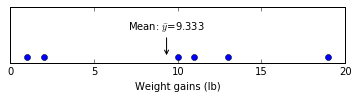

In [4]:
# Compute mean
mean = table_1['Weight gains (lb)'].mean()

# Dot plo
plt.figure(figsize=[6, 1])  # Make elongated figure
x = table_1['Weight gains (lb)']
y = [1]*len(table_1['Weight gains (lb)'])  # Place all y-values at one
plt.plot(x, y, 'o')
plt.yticks([])
plt.xlim(0,20)
plt.ylim(0,10)
plt.annotate(  # Show location of mean
    r'Mean: $\bar y$=' + f'{mean:3.3f}',
    xy=(mean,1), 
    xytext=(mean,6),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.xlabel('Weight gains (lb)')

plt.savefig(
    fname='weight_gains_dot_plot_mean.png',
    dpi=300,
    bbox_inches='tight'
)


While the median divides the data into two equal halves (i.e., the same number of observations
above and below), the mean can be thought of as the "point of balance" of the data. If the data points 
were weighted on a seesaw, then the seesaw would tip if the fulcrum were placed at $\tilde y$ 
despite there being the same number of points on either side. This balance is due to the fact that the mean is located so that the sum of the distances from the
data points to the mean (referred to as deviates, but more on deviates later) on each side of the
mean are equal.

When comparing the median and the mean as two different measures of central tendency we can
compare how sensitive they are to changes in the data. Recall that the original (ordered) lamb
data was: 1 2 10 11 13 19. What happens if we change the last value, 19? If, for example, it had
been 12 instead of 19, then  $\tilde y$ = 10.5 still, but $\bar y$ = 8.2. Or if the value 19 was deleted from the
data altogether, then $\tilde y$ = 10 while $\bar y$ = 7.4. As you can see, the mean (balance point) is much more sensitive to changes than the median. The median is thus more resist or **rubust** to changes compared to the mean.

If we utilize some of the data display techniques we learned last time we can better visualize
these summary statistics. Given that both the median and mean measure the central tendency in
the data, they are found towards the middle of a data distribution, but their exact location as well
as their proximity to each other will depend on the exact data distribution. If a distribution is
symmetric, then the median and mean will be found at the same location, namely the center of
the distribution. If, however, the distribution is skewed, then the mean will be pulled
further towards the long tail as it is more influenced by the extreme data values than the median
(i.e., the median is more robust).

Median: 3.7
Mean: 4.3352941176470585


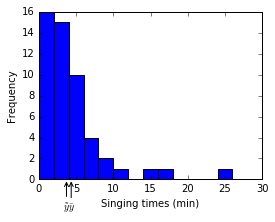

In [5]:
# Data for fifty-one cricket singing times
table_2 = pd.DataFrame({
    'Singing times (min)': [
        4.3, 3.9, 17.4, 2.3, 0.8, 1.5, 0.7, 3.7,
        24.1, 9.4, 5.6, 3.7, 5.2, 3.9, 4.2, 3.5,
        6.6, 6.2, 2.0, 0.8, 2.0, 3.7, 4.7,
        7.3, 1.6, 3.8, 0.5, 0.7, 4.5, 2.2,
        4.0, 6.5, 1.2, 4.5, 1.7, 1.8, 1.4,
        2.6, 0.2, 0.7, 11.5, 5.0, 1.2, 14.1,
        4.0, 2.7, 1.6, 3.5, 2.8, 0.7, 8.6
    ]
})

# Plot histogram with median and mean
table_2.plot.hist(
    figsize=(4, 3),
    bins=range(0,30,2),
    legend=False

)
median = table_2['Singing times (min)'].median()
print('Median:', median)
plt.annotate(
    r'$\tilde y$',
    xy=(median,0), 
    xytext=(median,-3),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
mean = table_2['Singing times (min)'].mean()
print('Mean:', mean)
plt.annotate(
    r'$\bar y$',
    xy=(mean,0), 
    xytext=(mean,-3),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.xlabel('Singing times (min)')
plt.legend

plt.savefig(
    fname='singing_times.png',
    dpi=300,
    bbox_inches='tight'
)

## Quartiles and Boxplots

The concept of dividing the data into two “halves” used for the median can be further developed.
The data can thus be divided into “quarters” where the lowest quarter represents the first (lowest)
25% of the data, the second quarter the data found between 25% and 50%, etc. These quarters
are referred to as **quartiles** ($Q$) where $Q_1$ represents the lowest 25%, $Q_2$ the next 25%, etc. Note,
$Q_2$ is the same as the median of the whole data set, while $Q_1$ and $Q_3$ are the medians of the lower
half and upper half of the data set, respectively. For example, if we have collected the following
data about the systolic blood pressures (mm Hg) of seven middle-aged men:

In [6]:
# Blood pressure (mm Hg) of middle-aged men
table_3 = pd.DataFrame({
    'Middle-aged men': [151, 124, 132, 170, 146, 124, 113]
})
table_3

Middle-aged men
0              151
1              124
2              132
3              170
4              146
5              124
6              113

Putting these values in rank order, the sample is

In [7]:
table_3.sort_values(by='Middle-aged men')

Middle-aged men
6              113
1              124
5              124
2              132
4              146
0              151
3              170

The median is the fourth largest observation, which is 132 (index **2**). There are three data points in the
lower part of the distribution: 113, 124, and 124. The median of these three values is 124. Thus,
the first quartile, $Q_1$ is 124.

In [8]:
Q_1 = table_3['Middle-aged men'].quantile(q=0.25)  # The median of lower part of tedataset
Q_2 = table_3['Middle-aged men'].quantile(q=0.50)  # The median of the entier dataset
Q_3 = table_3['Middle-aged men'].quantile(q=0.75)  # The median of lower part of tedataset

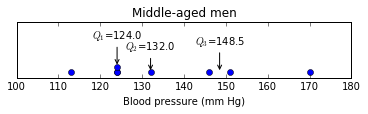

In [9]:
# Dot plot with median
plt.figure(figsize=[6, 1])  # Make elongated figure
x = table_3['Middle-aged men']
y = [1]*len(table_3['Middle-aged men'])  # Place all y-values at one
plt.plot(x, y, 'bo')
plt.plot([124],2,'bo')  # Add extra dot at 124 that was hidden
plt.yticks([])
plt.xlim(100,180)
plt.ylim(0,10)

# Compute and show quantiles
Q_1 = table_3['Middle-aged men'].quantile(q=0.25)  # The median of lower part of tedataset
Q_2 = table_3['Middle-aged men'].quantile(q=0.50)  # The median of the entier dataset
Q_3 = table_3['Middle-aged men'].quantile(q=0.75)  # The median of lower part of tedataset
plt.annotate(  # Show first quantile
    r'$Q_1$=' + f'{Q_1}',
    xy=(Q_1,2), 
    xytext=(Q_1,7),
    ha='center',     
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(
    r'$Q_2$=' + f'{Q_2}',
    xy=(Q_2,1), 
    xytext=(Q_2,5),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(
    r'$Q_3$=' + f'{Q_3}',
    xy=(Q_3,1), 
    xytext=(Q_3,6),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.xlabel('Blood pressure (mm Hg)')
plt.title('Middle-aged men')

plt.savefig(
    fname='blod_pressure_dot_plot.png',
    dpi=300,
    bbox_inches='tight'
)

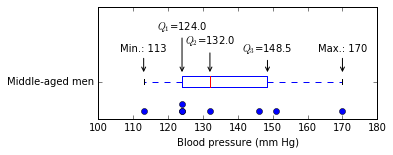

In [10]:
table_3.boxplot(
    figsize=(5,2),
    grid=False,  # Remove grid lines
    vert=False 
)
plt.xlim(100,180)
plt.xlabel('Blood pressure (mm Hg)')

plt.ylim(0.5,2)

plt.annotate(  # Show location of first quantile
    r'$Q_1$=' + f'{Q_1}',
    xy=(Q_1, 1.1), 
    xytext=(Q_1, 1.7),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(   # Show location of secound quantile
    r'$Q_2$=' + f'{Q_2}',
    xy=(Q_2, 1.1), 
    xytext=(Q_2, 1.5),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate( #   Show location of third quantile
    r'$Q_3$=' + f'{Q_3}',
    xy=(Q_3, 1.1), 
    xytext=(Q_3, 1.4),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
min_value = table_3['Middle-aged men'].min()
plt.annotate( #   Show minumum value
    r'Min.: ' + f'{min_value}',
    xy=(min_value, 1.1), 
    xytext=(min_value, 1.4),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
max_value = table_3['Middle-aged men'].max()
plt.annotate( #   Show minumum value
    r'Max.: ' + f'{max_value}',
    xy=(max_value, 1.1), 
    xytext=(max_value, 1.4),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)

# Plot dots
x = table_3['Middle-aged men']
y = [0.60]*len(table_3['Middle-aged men'])  # Place all y-values at one
plt.plot(x, y, 'bo')
plt.plot([124],0.70,'bo')  # Add extra dot at 124 that was hidden

plt.savefig(
    fname='blod_pressure_box_plot.png',
    dpi=300,
    bbox_inches='tight'
)

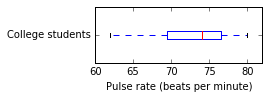

In [11]:
# Pulse rates of 12 college students
table_4 = pd.DataFrame({
    'College students': [
        62, 64, 68, 70, 70, 
        74, 74, 76, 76, 78, 
        78, 80
    ]
})

table_4.boxplot(
    figsize=(3,1),
    grid=False,  # Remove grid lines
    vert=False 
)
plt.xlim(60,82)
plt.xlabel('Pulse rate (beats per minute)')

plt.savefig(
    fname='college_students_box_plot.png',
    dpi=300,
    bbox_inches='tight'
)

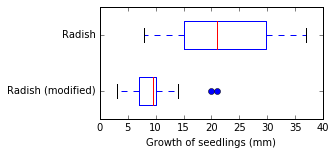

In [12]:
series_1 = pd.Series(
    name='Radish',
    data=[
        15, 20, 11, 30, 33,
        20, 29, 35, 8,  10,
        22, 37, 15, 25
    ]
)
series_2 = pd.Series(
    name='Radish (modified)',
    data=[
        3, 5, 5, 7, 7, 8, 9,
        10, 10, 10, 10,
        14, 20, 21
    ]
)
table_5 = pd.concat([series_2, series_1],axis='columns')

blue_dot = dict(markerfacecolor='blue', marker='o')
table_5.boxplot(
    grid=False,
    widths=0.5,  # Make boxes a bit larger
    figsize=(4,2),
    flierprops=blue_dot,  # Make outliers (flier) as blue dots 
    vert=False
)

plt.xlabel('Growth of seedlings (mm)')

plt.savefig(
    fname='radish_box_plot.png',
    dpi=300,
    bbox_inches='tight'
)

The mean value is 73.0
0
1
2
3
4


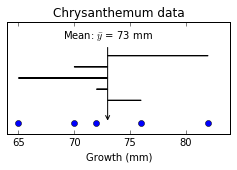

Table that can be copied into LaTex:

\begin{tabular}{lrrr}
\toprule
{} &  Observation &  Deviation &  Squared deviation \\
\midrule
0 &           76 &        3.0 &                9.0 \\
1 &           72 &       -1.0 &                1.0 \\
2 &           65 &       -8.0 &               64.0 \\
3 &           70 &       -3.0 &                9.0 \\
4 &           82 &        9.0 &               81.0 \\
\bottomrule
\end{tabular}



In [13]:
# Chrysanthemum data
table_6 = pd.DataFrame({
    'Observation': [
        76, 72, 65, 70, 82
    ]
})

# Compute mean
mean = table_6['Observation'].mean()
print(f'The mean value is {mean}')

deviation = table_6['Observation']-mean
table_6['Deviation'] = deviation

squared_deviation = deviation**2
table_6['Squared deviation'] = squared_deviation

# Make dot plot
plt.figure(figsize=(4,2))
plt.yticks([])
plt.xlim(64,84)
plt.ylim(0,10)
x = table_6['Observation']
y = [1]*len(table_6['Observation'])  # Place all y-values at one
plt.plot(x, y, 'o')
plt.xlabel('Growth (mm)')
plt.title('Chrysanthemum data')

# Add annotation arrows
plt.annotate(  # Show location of mean
    r'Mean: $\bar y$ =' + f'{mean:3.0f} mm',
    xy=(mean,1), 
    xytext=(mean,8.5),
    ha='center',
    arrowprops = dict(arrowstyle='->')
)
for n, y_n in enumerate(table_6['Observation']):
    print(n)
    plt.arrow(mean,n+3,y_n-mean,0)
plt.savefig(
    fname='chrysanthemum.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

print('Table that can be copied into LaTex:\n')
print(table_6.to_latex())